<a href="https://colab.research.google.com/github/jiankh/HeartDiseaseAnalysis/blob/main/HeartDiseaseData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Analysis

[Original Data Compilation](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

From Original Data Source:

---


"Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help."


### Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("heart.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Things to note:


*   There are no NULL data
*   Some Features have zeros as a data points where it should not be possible.
*   The DataFrame contains a mix of categorical and numerical data.






## Data Visualization and Cleaning

In [ ]:
df_clean = df.copy()
#New copy of DataFrame to update and clean the data.



---


### Age

Age is normally distributed and balanced



Text(0.5, 1.0, 'Age Distribution')

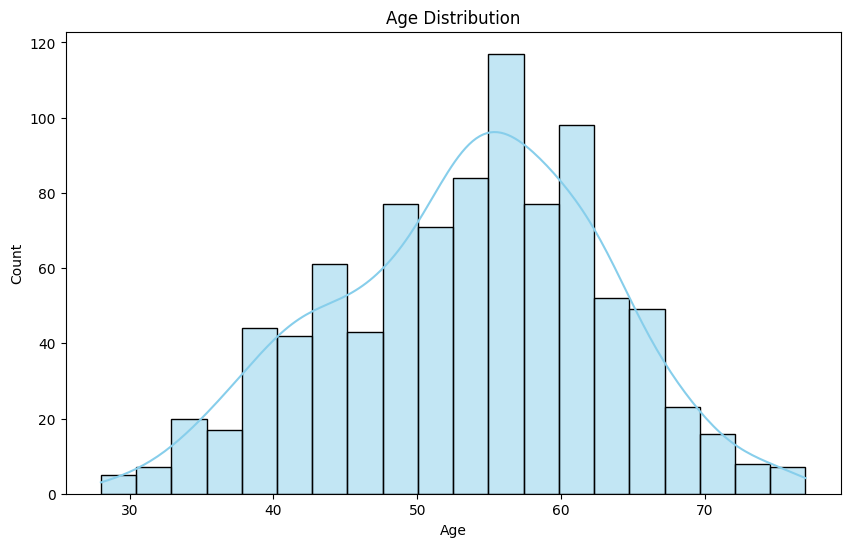

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", bins=20, kde=True, color="skyblue")
plt.title("Age Distribution")

### Gender

Most patients in the Data Frame are male with about 79% being male.

Text(0.5, 1.0, 'Gender Distribution')

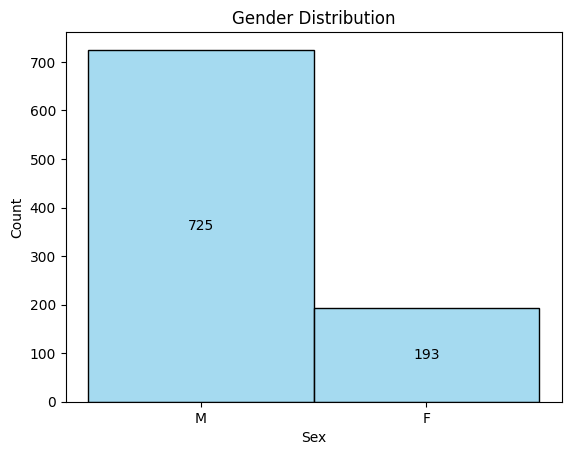

In [ ]:
ax = sns.histplot(data=df, x="Sex", color="skyblue")
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Gender Distribution")

### Resting Blood Presure
Resting blood pressure data has one zero data point, which should be impossible. Upon inspection, the zero BP patient also does not have a Cholesterol level and a fastingBS . All three of these fields should not be zero. The patient will be omitted from the dataframe.

In [ ]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


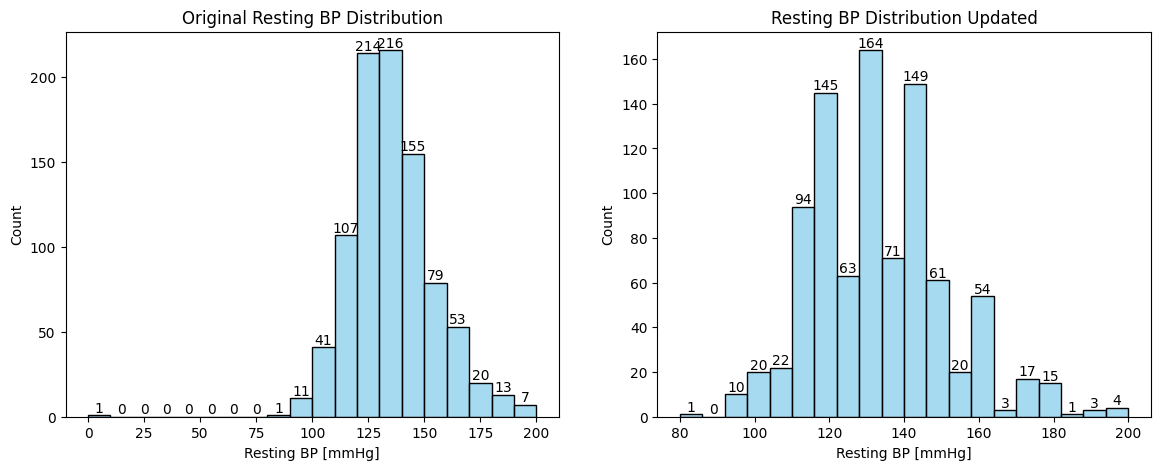

In [ ]:
fig2, axs = plt.subplots(1, 2, figsize=(14, 5))

ax = sns.histplot(data=df, x="RestingBP", bins=20, color="skyblue", ax=axs[0])
axs[0].set_title("Original Resting BP Distribution")
axs[0].set_xlabel("Resting BP [mmHg]")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

df_clean = df[df["RestingBP"] != 0].copy()
ax_bp = sns.histplot(data=df_clean, x="RestingBP", bins=20, color="skyblue", ax=axs[1])
plt.title("Resting BP Distribution Updated")
plt.xlabel('Resting BP [mmHg]')
for container in ax_bp.containers:
    ax_bp.bar_label(container, label_type='edge')

### Fasting Blood Sugar

Fasting blood sugar is measure as a categorical feature in this dataset, where 0 means the patient's Blood Sugar was under 120 mg/dl and 1 is when the patients fasting blood sugar is higher than 120 mg/dl.

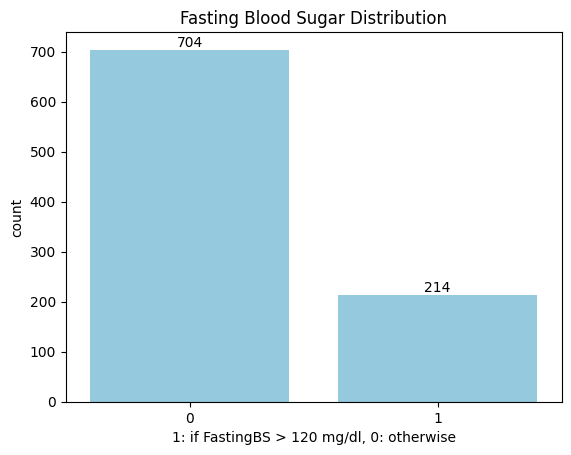

In [ ]:
ax = sns.countplot(data=df, x="FastingBS", color="skyblue")
plt.title("Fasting Blood Sugar Distribution")
plt.xlabel('1: if FastingBS > 120 mg/dl, 0: otherwise')
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

### Cholesterol

For the cholesterol levels of the patients,  the data show about 170 data points of zero cholesterol. Zero levels of cholesterol should not be possible for patients.

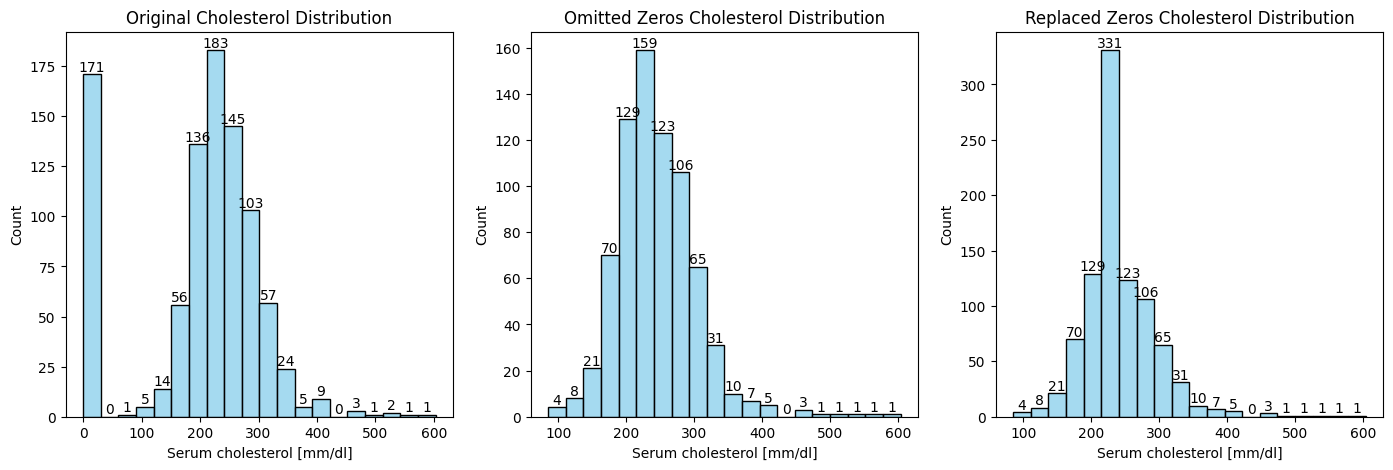

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

#Original Data
ax = sns.histplot(data=df_clean, x="Cholesterol", bins=20,color="skyblue", ax=axs[0])
axs[0].set_title("Original Cholesterol Distribution")
axs[0].set_xlabel("Serum cholesterol [mm/dl]")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

#Dropped data showing Zero cholesterol
df_drop_chol = df[df["Cholesterol"] != 0].copy()
ax_chol = sns.histplot(data=df_drop_chol, x="Cholesterol", bins=20, color="skyblue", ax=axs[1])
axs[1].set_title("Omitted Zeros Cholesterol Distribution")
axs[1].set_xlabel("Serum cholesterol [mm/dl]")
for container in ax_chol.containers:
    ax_chol.bar_label(container, label_type='edge')

#Replaced zero data point with median
df_replaced_chol = df.copy()
chol_median = df[df['Cholesterol'] != 0]['Cholesterol'].median()
df_replaced_chol['Cholesterol'] = df['Cholesterol'].replace(0, chol_median)
ax_chol_replace = sns.histplot(data=df_replaced_chol, x="Cholesterol", bins=20, color="skyblue", ax=axs[2])
axs[2].set_title("Replaced Zeros Cholesterol Distribution")
axs[2].set_xlabel("Serum cholesterol [mm/dl]")
for container in ax_chol_replace.containers:
    ax_chol_replace.bar_label(container, label_type='edge')

In [ ]:
chol_df = [
    ('Original', df_clean),
    ('Omitted Zeros', df_drop_chol),
    ('Replaced Zeros', df_replaced_chol)
]

cholesterol_compare = []

for label, x in chol_df:
    r, p = pearsonr(x['Cholesterol'], x['HeartDisease'])
    cholesterol_compare.append({
        'Dataset': label,
        'R-value': round(r, 2),
        'P-value': format(p, '.6f')
    })

compare_chol_table = pd.DataFrame(cholesterol_compare)
compare_chol_table



,Dataset,R-value,P-value
0,Original,-0.23,0.000000
1,Omitted Zeros,0.10,0.004514
2,Replaced Zeros,0.08,0.021092


In [ ]:
df_clean['Cholesterol'] = df['Cholesterol'].replace(0, chol_median)

The statistical analysis of significance showed a stong negative correlation with a r-value of -0.23 which is most likely skewed by the zeros. When replacing zeros with the median, the data shows a slight positive correlation and significance. The correlation after omitting zeros shows slight better results of correlation and significance. However, to preseve data volue and modelling robustness, the data with omitted zeros will be used to analysis significance and the replacement with median will be use for modelling.

### Resting ECG

Text(0.5, 1.0, 'Resting ECG')

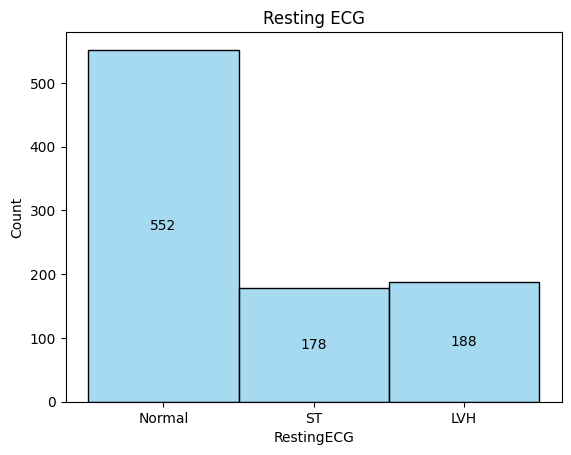

In [ ]:
ax = sns.histplot(data=df, x="RestingECG", color="skyblue")
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Resting ECG")

Most patients had a normal resting ECG. About 60% of patients had a normal ECG, and the rest were split almost evenly with having ST-T wave abnormality or left ventricular hypertrophy.

### Max Heart Rate

Max heart rate graph appears to have a normal distribuition with a slight dip in middle of the curve.  

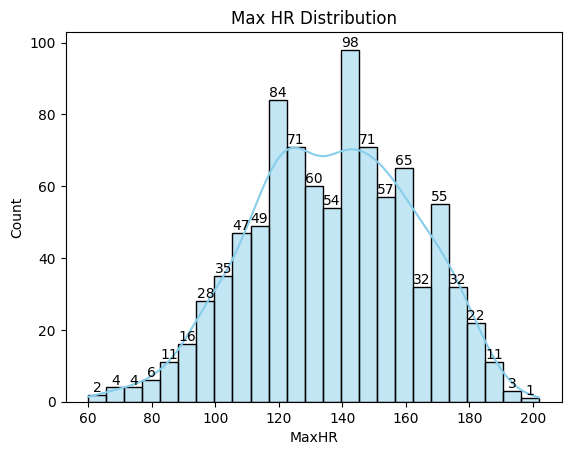

In [ ]:
ax = sns.histplot(data=df, x="MaxHR", bins=25,kde=True, color="skyblue")
plt.title("Max HR Distribution")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

In [ ]:
print(f"Median = {df_clean['MaxHR'].median()}")
print(f"Mean = {df_clean['MaxHR'].mean()}")

Median = 138.0
Mean = 136.78953107960743


The small dip around the middle of the graph does not seem to be of any concern. The median and mean are almost the same, signifying a normal distribution. The KDE line shows the true distribution. The small dip could be because of bins edge but overall the mayority of patients show a max HR around 120-160 BPM.

### Chest Pain Type

Mayority of patients reported Asymptomatic for chest pain.

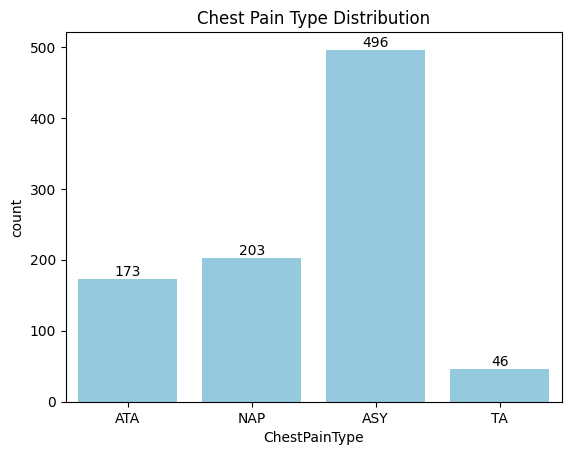

In [ ]:
ax = sns.countplot(data=df, x="ChestPainType",color="skyblue")
plt.title("Chest Pain Type Distribution")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

### Exercise Angina

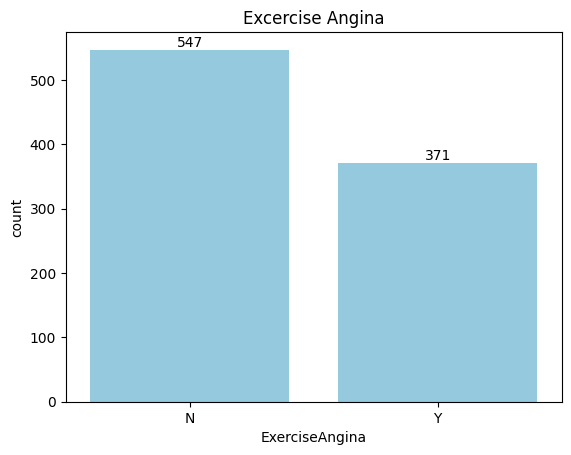

In [ ]:
ax = sns.countplot(data=df, x="ExerciseAngina",color="skyblue")
plt.title("Excercise Angina")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

### ST Slope

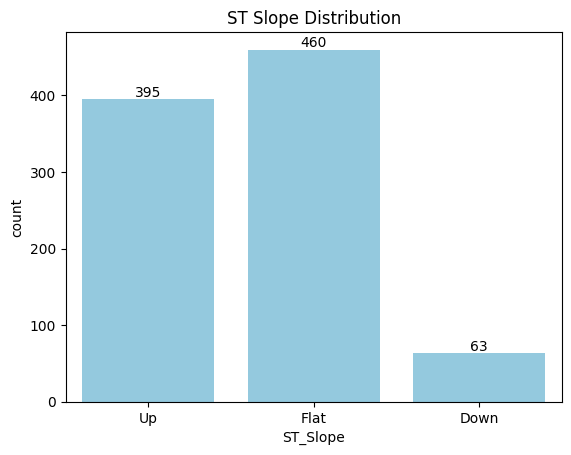

In [ ]:
#ST Slope
ax = sns.countplot(data=df, x="ST_Slope",color="skyblue")
plt.title("ST Slope Distribution")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

### Old Peak

The Old Peak distribution is skew to left with a skewness value of 1.02. The skewness is due to the mayority of patients with an old peak of 0. By definition, Oldpeak is the ST segment depression which should not have any negative values (negative would mean an elevation instead). There are 13 patients with a negative oldpeak. The negative values will be kept because it seems in the data that even within the negative numbers, the patients with an oldpeak further away from zero are positive to heart disease.

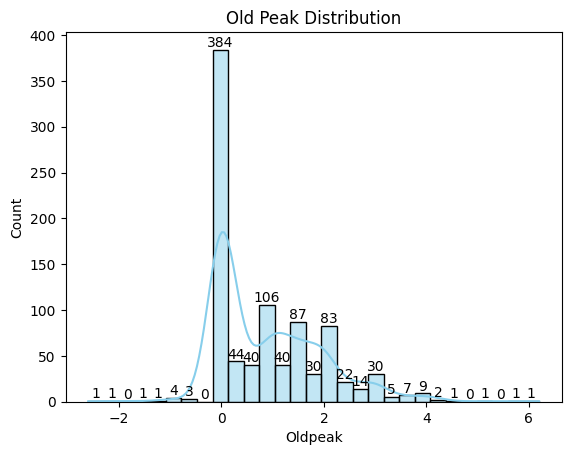

In [ ]:
ax = sns.histplot(data=df, x="Oldpeak", color="skyblue", kde=True)
plt.title("Old Peak Distribution")
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

In [ ]:
print(f" Skewness = {df_clean['Oldpeak'].skew()}")
df_clean[df_clean["Oldpeak"] < 0]

 Skewness = 1.024544634289045


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,237,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,237,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,237,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,237,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,237,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,237,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,237,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,237,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,237,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,237,1,Normal,72,Y,-0.5,Flat,1




---


## Analysis of Correlation with Heart Disease


A heatmap correlation will be use to summarize and show correlation of data with heart disease. All categorical data will be change into a numerical data for the heatmap. One-hot-encoding will be use to split the categorical data into multiple features of no or yes (0 and 1). The P-Value will also be calculated to see significance of the correlation. For the P-Value, we will use the pearsonR p-value similar to the heatmap for numerical data, and we will use Chi2 to get the P-value for any categorical data.

In [ ]:
#replace 'M' and 'F' with 1 and 0
df_clean['Sex'] = df_clean['Sex'].map({'M': 1, 'F': 0})
df_clean['ExerciseAngina'] = df_clean['ExerciseAngina'].map({'Y': 1, 'N': 0})

#pd.get_dummies for multi-category columns split columns and make them T/F
df_encoded = pd.get_dummies(df_clean, drop_first=False)

In [ ]:
df_encoded.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True


<Axes: >

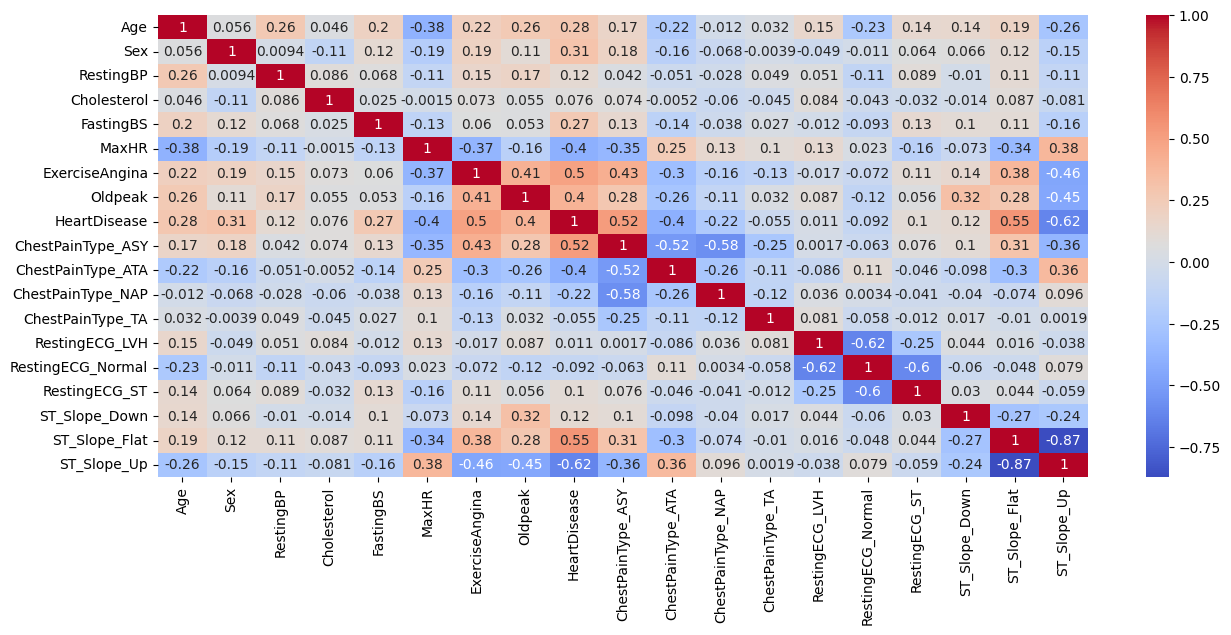

In [ ]:
# Correlation heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")

(array([0.5]), [Text(0, 0.5, 'HeartDisease')])

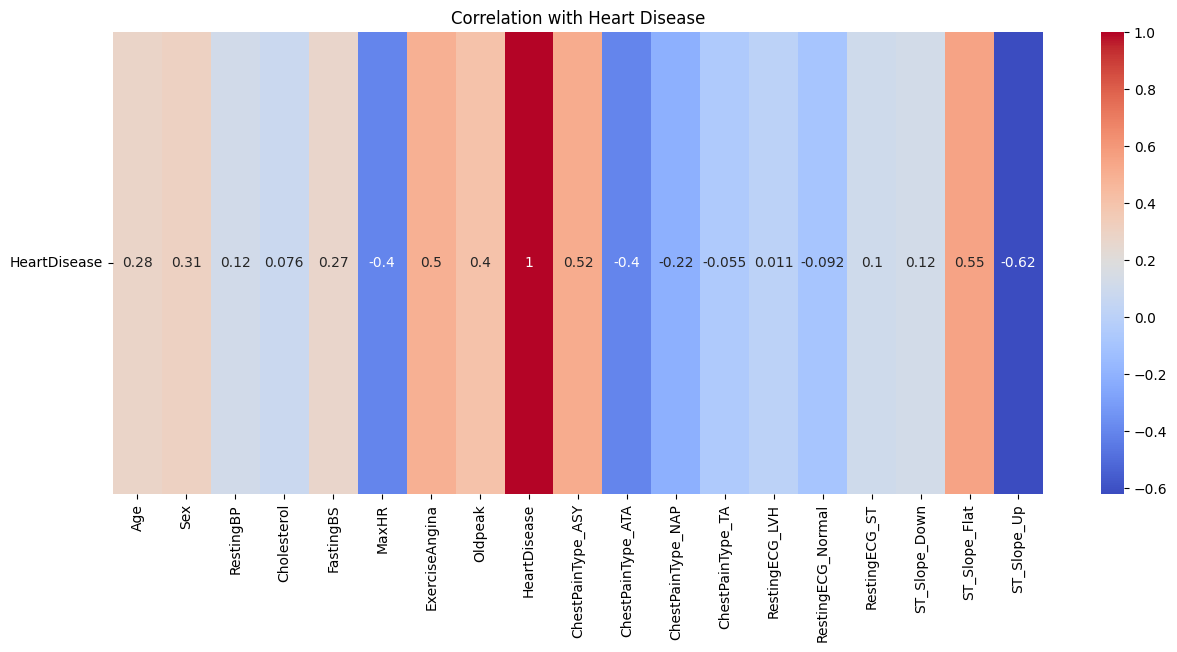

In [ ]:
#
HD_corr = df_encoded.corr()[['HeartDisease']].T
plt.figure(figsize=(15,6))
sns.heatmap(HD_corr, annot=True, cmap="coolwarm", cbar=True,)
plt.title("Correlation with Heart Disease")
plt.yticks(rotation=0)

In [ ]:
numeric_features = ['Age','RestingBP','Cholesterol','MaxHR', 'Oldpeak']
corr_numeric = []
for col in numeric_features:
    r, p = pearsonr(df_encoded[col], df_encoded['HeartDisease'])
    corr_numeric.append({
        'Feature':col,
        'R-value': round(r,2),
        'P-value':format(p, '.6f')
    })
corr_numeric_df = pd.DataFrame(corr_numeric)
corr_numeric_df

,Feature,R-value,P-value
0,Age,0.28,0.000000
1,RestingBP,0.12,0.000343
2,Cholesterol,0.08,0.020912
3,MaxHR,-0.40,0.000000
4,Oldpeak,0.40,0.000000


In [ ]:
categorical_features = ['Sex', 'ChestPainType', 'ST_Slope', 'RestingECG', 'ExerciseAngina', 'RestingBP', 'FastingBS']
corr_cate = []
for col in categorical_features:
    table = pd.crosstab(df[col], df['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(table)
    corr_cate.append({
        'Feature':col,
        'Chi2 Stat': round(chi2,2),
        'P-value':format(p, '.6f')
    })

corr_cate_df = pd.DataFrame(corr_cate)
corr_cate_df

,Feature,Chi2 Stat,P-value
0,Sex,84.15,0.000000
1,ChestPainType,268.07,0.000000
2,ST_Slope,355.92,0.000000
3,RestingECG,10.93,0.004229
4,ExerciseAngina,222.26,0.000000
5,RestingBP,93.64,0.014258
6,FastingBS,64.32,0.000000


---
### Age

Age has correlation R-value of 0.28 with Heart Disease and P-value lower than 0.00000. This shows a positive correlation with a good significance.

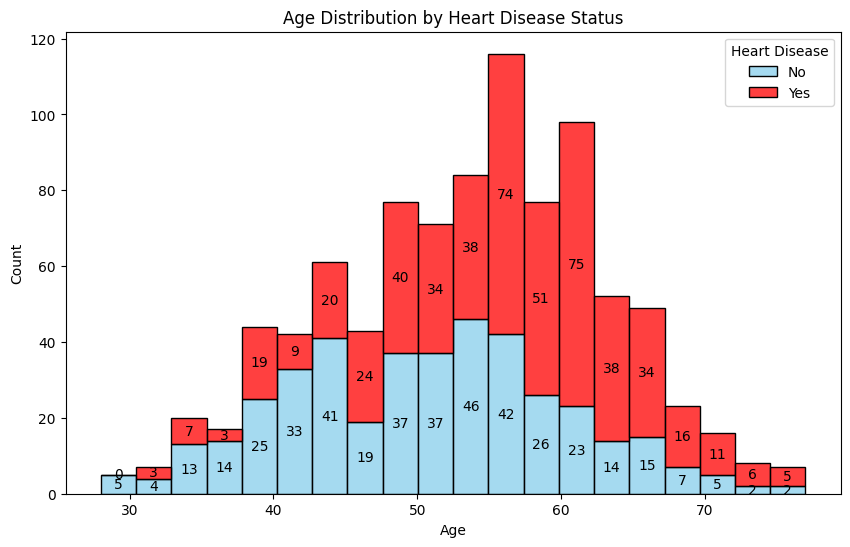

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_clean, x="Age", bins=20, color="skyblue", hue='HeartDisease', multiple='stack', palette={0: 'skyblue', 1: 'red'}, hue_order=[1, 0])
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.title("Age Distribution by Heart Disease Status")
for container in ax.containers:
    ax.bar_label(container, label_type='center')

### Gender

Although there are more male subjects in the study (about 79% of the subjects are male), we can still use the data to show the likelyhood of heart disease based on gender. About 63% of male patients in the data show to have heart disease, whereas only 26% of the female patients have a heart disease.
The Correlation shows as 0.31 with a P-value under 0.00000.

Text(0.5, 1.0, 'Gender Distribution')

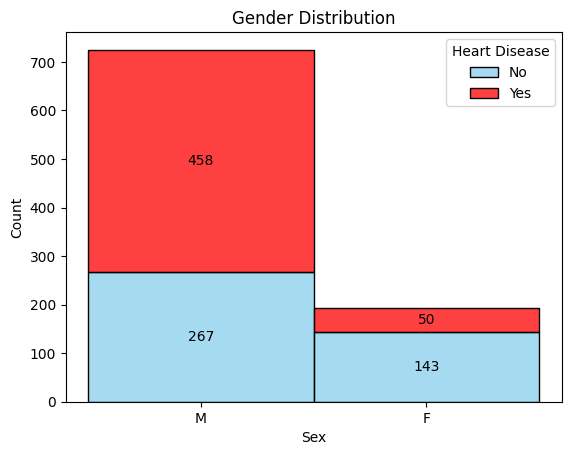

In [ ]:
#Heart Disease and Gender Correlation of 0.31.
#Although there are more male subjects in the study (about 79% of the subjects are male), we can still use this data to see
#If there is any correlation involving Gender and Heart Disease.
ax = sns.histplot(data=df, x="Sex", color="skyblue", hue='HeartDisease',hue_order=[1, 0], multiple='stack', palette={0: 'skyblue', 1: 'red'}, )
plt.legend(title="Heart Disease", labels=["No", "Yes"])
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.title("Gender Distribution")

### Resting Blood Pressure

The resting blood pressure of patient shows to have a r-value of 0.12 and a p-value of 0.000343. Although, compared to the rest of features it is not as strong of a correlation, there statistical analysis still appears to validate its correlation. The data shows a very even distribution throughout the bins with a slight increase at higher blood pressures.

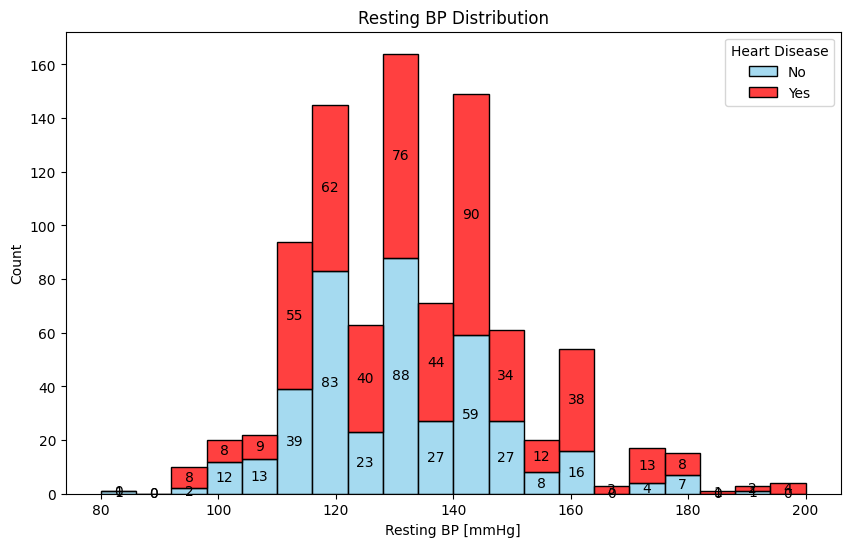

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_clean, x="RestingBP", bins=20, color="skyblue", hue='HeartDisease', hue_order=[1, 0], multiple='stack', palette={0: 'skyblue', 1: 'red'},)
plt.title("Resting BP Distribution")
plt.xlabel('Resting BP [mmHg]')
plt.legend(title="Heart Disease", labels=["No", "Yes"])
for container in ax.containers:
    ax.bar_label(container, label_type='center')

### Fasting Blood Sugar

Fasting blood sugar showed a Chi2 of 64.32 and a significance p-value lower than 0.000000.
The graph shows a significant difference between patients that have a 120mg/dl blood sugar while fasted compare to over that threshold. 48% of patients who reported in the lower end have heart disease. A significant increase to 79% of patients with higher fasted blood sugar reported having heart disease.

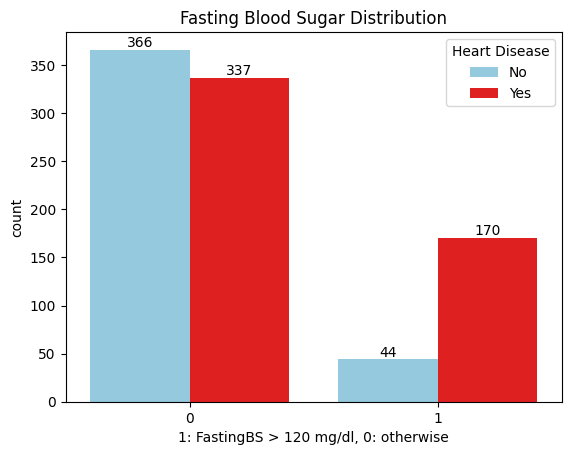

In [ ]:
ax = sns.countplot(data=df_clean, x="FastingBS", color="skyblue", hue='HeartDisease', palette={0: 'skyblue', 1: 'red'},)
plt.title("Fasting Blood Sugar Distribution")
plt.xlabel('1: FastingBS > 120 mg/dl, 0: otherwise')
plt.legend(title="Heart Disease", labels=["No", "Yes"])
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

### Cholesterol

Cholesterol shows a correlation of 0.08 and a p-value of 0.020912. This makes the cholesterol feature the lowest in correlation and lowest significance among the data in the dataset.
The data for the cholesterol is normally distributed with a slight skewness due to the outlier with high cholesterol. The bins also show an even distribution of patient with and without heart disease.

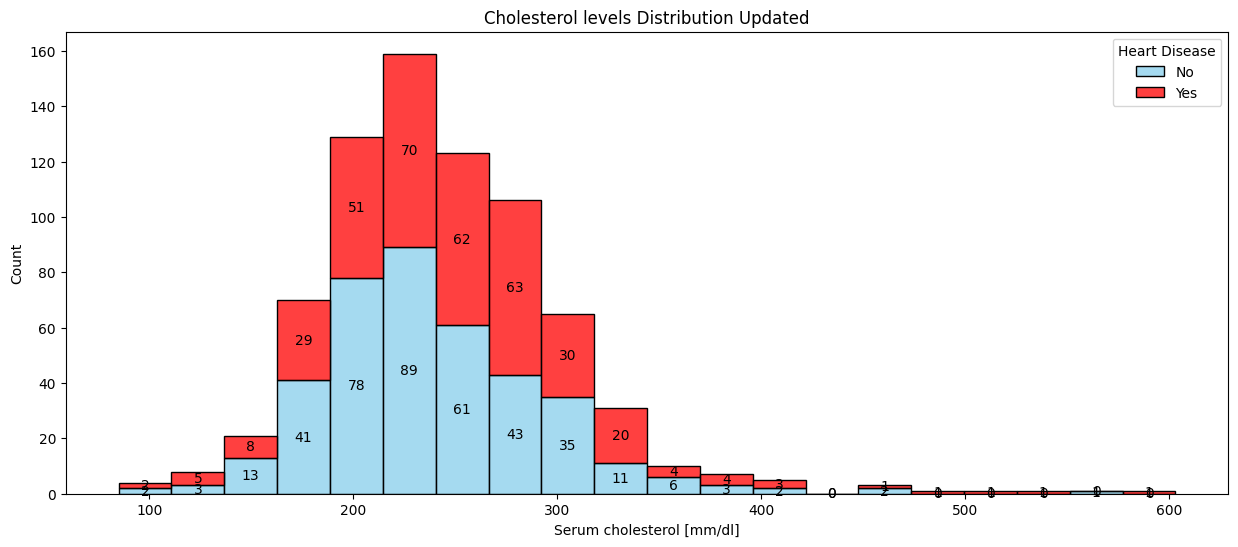

In [ ]:
plt.figure(figsize=(15,6))
ax_chol = sns.histplot(data=df_drop_chol, x="Cholesterol", bins=20, multiple='stack', color="skyblue",hue='HeartDisease', palette={0: 'skyblue', 1: 'red'}, hue_order=[1, 0])
plt.title("Cholesterol levels Distribution Updated")
plt.xlabel('Serum cholesterol [mm/dl]')
plt.legend(title="Heart Disease", labels=["No", "Yes"])
for container in ax_chol.containers:
    ax_chol.bar_label(container, label_type='center')

### Max Heart Rate
Max heart rate shows a -0.40 correlation with a significance of p-value less than 0.000000. The data suggests a strong relation between lower max heart rate and heart disease.

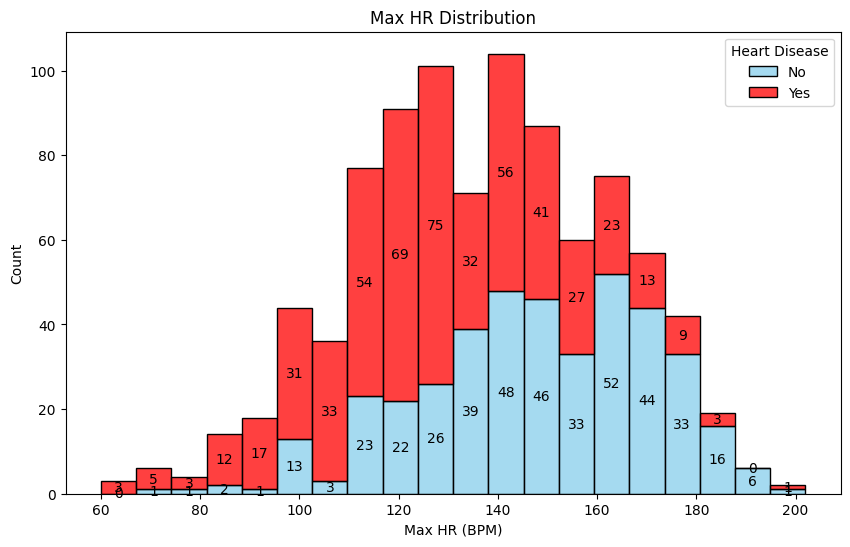

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_clean, x="MaxHR", bins=20, color="skyblue", multiple='stack', hue='HeartDisease', palette={0: 'skyblue', 1: 'red'},  hue_order=[1, 0] )
plt.title("Max HR Distribution")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xlabel('Max HR (BPM)')
for container in ax.containers:
    ax.bar_label(container, label_type='center')

### Resting ECG

Text(0.5, 1.0, 'Resting ECG')

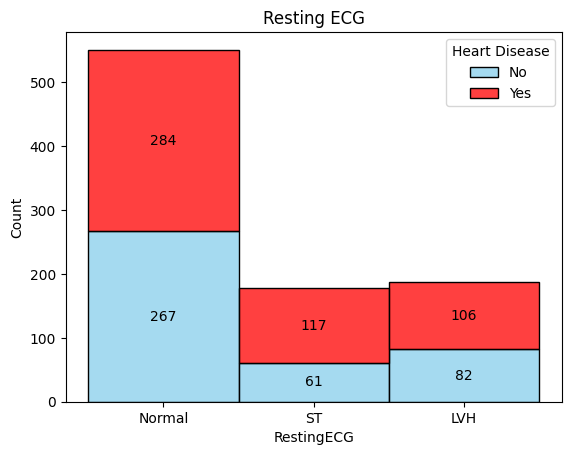

In [ ]:
ax = sns.histplot(data=df_clean, x="RestingECG", color="skyblue",  multiple='stack', hue='HeartDisease', palette={0: 'skyblue', 1: 'red'},  hue_order=[1, 0])
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.title("Resting ECG")

The resting ECG of patients showed a Chi2 stat of 10.93 and p-value of 0.004229. In comparison to the other data, it seems like the resting ECG shows less impact as a prediction of heart disease. We can observe this in the graph where the ratios of people with heart disease is not very distinct among the groups. Every group has around 50-65% distribution of patients with and without heart disease.   

### Chest Pain Type

The correlation heatmap shows a strong positive correlation between ASY (Asymptomatic) chest pain and heart disease (r = 0.52), and negative correlations for other types such as ATA (Atypical Angina, r = -0.40), NAP (Non-Anginal Pain, r = -0.21), and TA (Typical Angina, r = -0.055).

However, this doesn't mean that certain chest pain types prevent heart disease — the interpretation is limited by how one-hot encoding works.

Because only one chest pain type can be true for each patient, the dummy variables are mutually exclusive, creating artificial inverse relationships between categories. This skews the correlation values and should not be interpreted as direct causal links.
If one would have one take away from this data it would be even if one is Asymptomatic when it comes to Chest Pain, there is still a risk of Heart Disease.

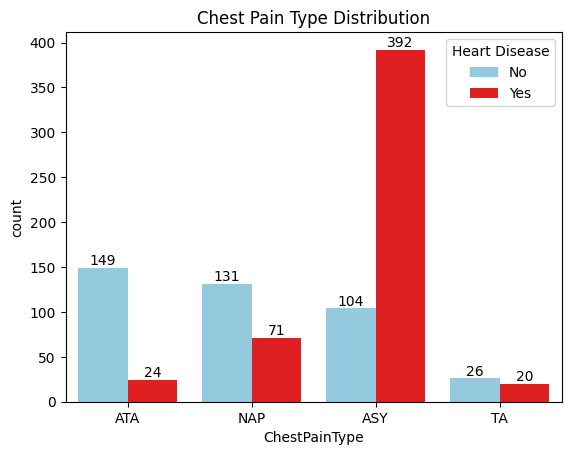

In [ ]:
ax = sns.countplot(data=df_clean, x="ChestPainType",color="skyblue", hue='HeartDisease',  palette={0: 'skyblue', 1: 'red'})
plt.title("Chest Pain Type Distribution")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

###Exercise Angina
ExerciseAngina	222.26	0.000000
Similar to TA (Typical Angina) from the previous graph, we have a more directly approach using excercise to test the patient using physical stress.
From a broad point of view, the graph shows a significant relation with excerise induced angina and patients with heart disease.
About 35% of people that denied angina after excercise have a known heart disease, where as 85% of patients that experience angina after excercise have known heart disease.

Exercise Angina shows a chi2 value of 222.26 and a p-value less than 0.000000.

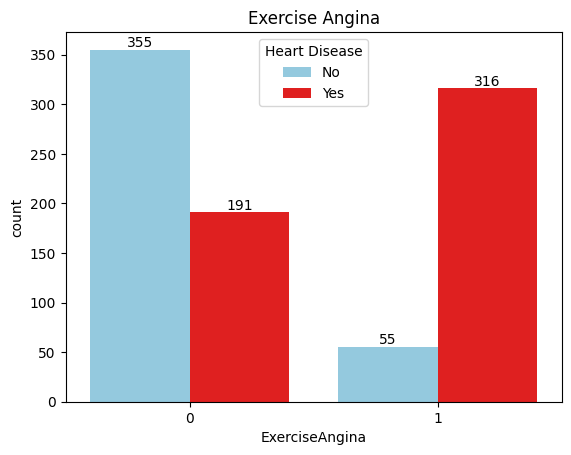

In [ ]:
ax = sns.countplot(data=df_clean, x="ExerciseAngina",color="skyblue", hue='HeartDisease', palette={0: 'skyblue', 1: 'red'})
plt.title("Exercise Angina")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

### ST Slope
ST Slope in a ECG has often been a great indicator of heart anormalities and in this data set we observe a great misproportion of
patients with Upward ST slope compare to Flat and Downwards ST slopes.
About 20% of patients that exibit a upwards ST slope have heart disease, where as Flat ST slope and Downwards ST slope show a 83% and 78% of patients with heart disease respectively.
355.92	0.000000

ST Slope shows a chi2 value of 355.92 and a p-value less than 0.000000. The statistical analysis shows the strongest correlation and significance in the data set.

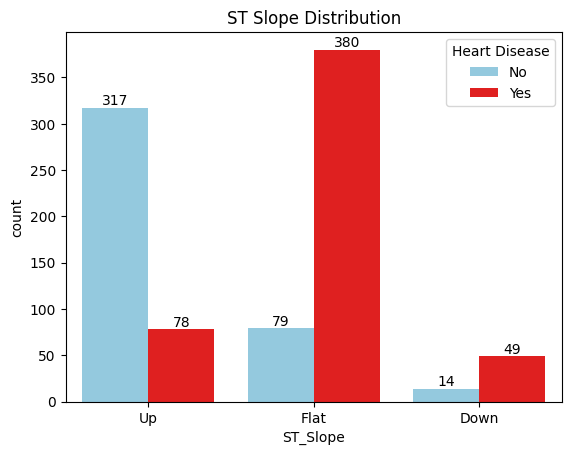

In [ ]:

ax = sns.countplot(data=df_clean, x="ST_Slope",color="skyblue", hue='HeartDisease', palette={0: 'skyblue', 1: 'red'})
plt.title("ST Slope Distribution")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

### Old Peak

Oldpeak	0.40	0.000000

Old peak is similar to the ST Slope analysis above where its measures the depression in the st slope.
Old peak shows a r-value correlation of 0.40 and a p-value of less than 0.000000.

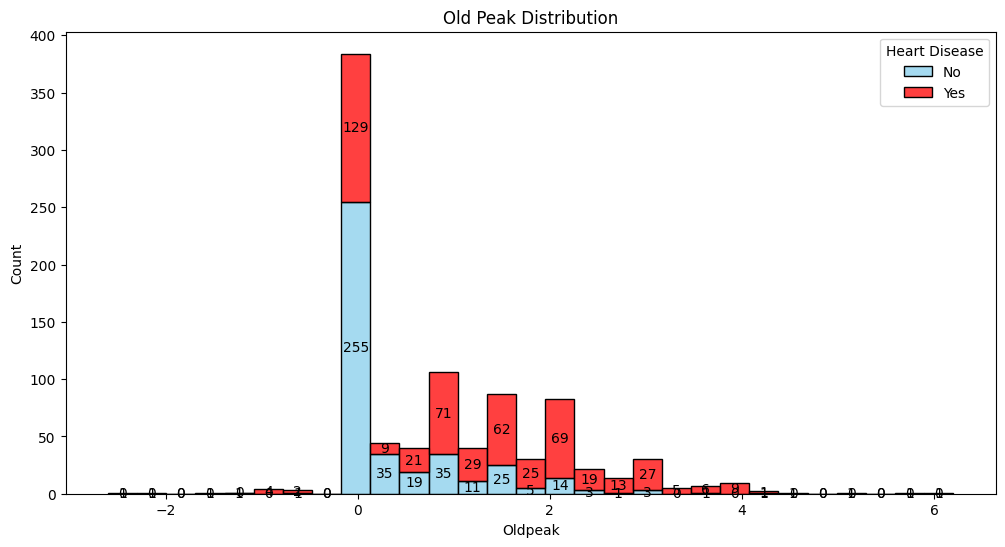

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=df, x="Oldpeak", color="skyblue" ,multiple='stack', hue='HeartDisease', palette={0: 'skyblue', 1: 'red'},  hue_order=[1, 0] )
plt.title("Old Peak Distribution")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
for container in ax.containers:
    ax.bar_label(container, label_type='center')

## Data Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        72
           1       0.92      0.87      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'Actual')

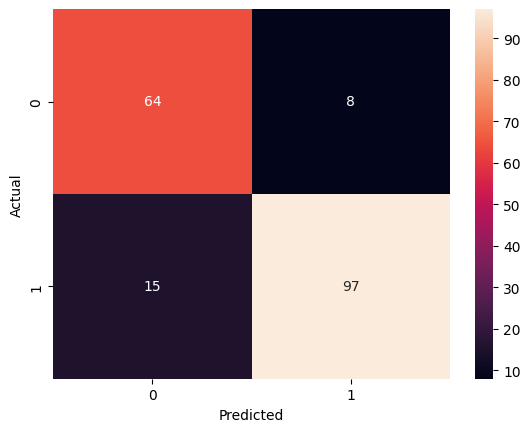

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

A second model without the least 3 features in the data:

In [ ]:
X2 = df_encoded.drop(["HeartDisease", "RestingECG_LVH", "RestingECG_Normal", "RestingECG_ST", "Cholesterol","RestingBP"], axis=1)
y2 = df_encoded["HeartDisease"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        72
           1       0.92      0.86      0.89       112

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Text(50.722222222222214, 0.5, 'Actual')

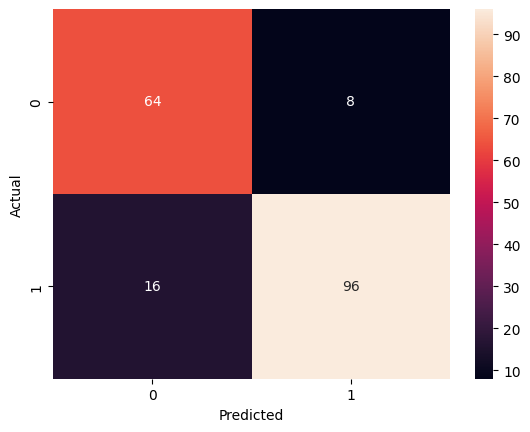

In [ ]:
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

The regression model achieved 88% accuracy, with high precision (92%) and recall (87%) in detecting heart disease. A reduced model excluding low-correlation features (RestingBP, RestingECG, Cholesterol) maintained strong performance (87% accuracy), suggesting that those features add minimal predictive value. The original model will be use because of the very slight increase in accuracy.
The model does a great job catching people with heart disease with a high True Positive. However, the the false positives are higher than the false negative. In a medical scenerio, we will ideally minimize the false negative since the false positive could be ruled out with other follow-up but a false negative might be fatal for patients.

In [ ]:
df_clean.to_csv("HD_df_cleaned.csv", index=False)